In [1]:
import pandas as pd

## Filtros

In [92]:
data = {
    "nome": ['Poliana', 'Alexa', 'Bruna', 'Cesar', 'Claudiene', 'Decio'],
    "estado": ['BA', 'SP', 'SP', 'MG', 'SP', 'SP'],
    "idade": [25, 19, 28, 39, 35, 27],
    "profissao": ['professora', 'professora', 'artista', 'artista', 'dev', 'dev']
}

In [93]:
df = pd.DataFrame(data)
df

,nome,estado,idade,profissao
0,Poliana,BA,25,professora
1,Alexa,SP,19,professora
2,Bruna,SP,28,artista
3,Cesar,MG,39,artista
4,Claudiene,SP,35,dev
5,Decio,SP,27,dev


In [6]:
# filtro simples
df[df['idade'] > 25]

,nome,estado,idade,profissao
2,Bruna,SP,28,artista
3,Cesar,MG,39,artista
4,Claudiene,AM,35,dev
5,Decio,SP,27,dev


In [7]:
lista_v_f = [True, False, True, False, True, False]
df[lista_v_f]

,nome,estado,idade,profissao
0,Poliana,BA,25,professora
2,Bruna,SP,28,artista
4,Claudiene,AM,35,dev


In [10]:
# and  - &
# or - | 
# not - ~ 

df[(df['idade'] > 20) & (df['estado'] == 'SP')]

,nome,estado,idade,profissao
2,Bruna,SP,28,artista
5,Decio,SP,27,dev


In [15]:
df[(df['idade'] > 30) | (df['estado'] == 'SP')]

,nome,estado,idade,profissao
1,Alexa,SP,19,professora
2,Bruna,SP,28,artista
3,Cesar,MG,39,artista


In [14]:
df[~(df['profissao'] == 'dev')]

,nome,estado,idade,profissao
0,Poliana,BA,25,professora
1,Alexa,SP,19,professora
2,Bruna,SP,28,artista
3,Cesar,MG,39,artista


In [20]:
df.query("not profissao == 'dev' and estado == 'SP'")

,nome,estado,idade,profissao
1,Alexa,SP,19,professora
2,Bruna,SP,28,artista


In [38]:
# alteracao dos valores
# loc[linhas, colunas]
df.loc[~(df['profissao'] == 'dev'), 'prof_dev'] = 'nao_dev'

In [40]:
df.loc[:, ['nome', 'profissao']]

,nome,profissao
0,Poliana,professora
1,Alexa,professora
2,Bruna,artista
3,Cesar,artista
4,Claudiene,dev
5,Decio,dev


In [41]:
df.filter(items=['nome', 'profissao'])

,nome,profissao
0,Poliana,professora
1,Alexa,professora
2,Bruna,artista
3,Cesar,artista
4,Claudiene,dev
5,Decio,dev


In [43]:
df[df['nome'].str.startswith('C')]

,nome,estado,idade,profissao,prof_dev
3,Cesar,MG,39,artista,nao_dev
4,Claudiene,AM,35,dev,NaN


In [44]:
sudeste = ['SP', 'MG', 'RJ', 'ES']
df[df['estado'].isin(sudeste)]

,nome,estado,idade,profissao,prof_dev
1,Alexa,SP,19,professora,nao_dev
2,Bruna,SP,28,artista,nao_dev
3,Cesar,MG,39,artista,nao_dev
5,Decio,SP,27,dev,NaN


## Funções personalizadas

In [57]:
def celsius_para_f(temperatura):
    temp_f = temperatura * 1.8 
    temp_f = temp_f + 32
    return temp_f
    

In [58]:
celsius_para_f(40)

104.0

In [59]:
temperaturas = [0, 10, 20, 30, 40, 50]

df = pd.DataFrame(temperaturas, columns=['temp_c'])
df

,temp_c
0,0
1,10
2,20
3,30
4,40
5,50


In [60]:
df['temp_f'] = df['temp_c'].apply(celsius_para_f)

In [61]:
df

,temp_c,temp_f
0,0,32.0
1,10,50.0
2,20,68.0
3,30,86.0
4,40,104.0
5,50,122.0


In [66]:
# usando base das pessoas
# filtro com funções personalizadas

def filtro_idade(idade):
    idade_em_50_anos = idade + 50
    return idade_em_50_anos > 70

df[df['idade'].apply(filtro_idade)]

,nome,estado,idade,profissao
0,Poliana,BA,25,professora
2,Bruna,SP,28,artista
3,Cesar,MG,39,artista
4,Claudiene,AM,35,dev
5,Decio,SP,27,dev


In [68]:
# comparacoes entre valores de uma mesma linha/coluna

dados = {
    '2012': [30, 40, 50],
    '2013': [50, 40, 20],
    '2014': [70, 40, 20],
    '2015': [40, 20, 40],
    '2016': [50, 50, 50]
}

df = pd.DataFrame(dados, index=['A', 'B', 'C'])
df

,2012,2013,2014,2015,2016
A,30,50,70,40,50
B,40,40,40,20,50
C,50,20,20,40,50


In [71]:
def diferenca_entre_anos(linha):
    #print(linha)
    return linha.max() - linha.min()

df['diff'] = df.apply(diferenca_entre_anos, axis=1)

In [72]:
df

,2012,2013,2014,2015,2016,diff
A,30,50,70,40,50,40
B,40,40,40,20,50,30
C,50,20,20,40,50,30


In [73]:
def media_por_ano(coluna):
    return coluna.mean()

df.apply(media_por_ano, axis=0)

2012    40.000000
2013    36.666667
2014    43.333333
2015    33.333333
2016    50.000000
diff    33.333333
dtype: float64

In [75]:
# map
def quadrado(x):
    #print(x)
    return x**2

df.map(quadrado)

,2012,2013,2014,2015,2016,diff
A,900,2500,4900,1600,2500,1600
B,1600,1600,1600,400,2500,900
C,2500,400,400,1600,2500,900


In [79]:
# usando base das pessoas
# todas as profissoes tenham letras maiuscula no inicio

def limpar_texto(texto):
    return texto.capitalize().replace(' ', '').replace('ã', 'a')

In [80]:
df['profissao'].apply(limpar_texto)

0    Professora
1    Professora
2       Artista
3       Artista
4           Dev
5           Dev
Name: profissao, dtype: object

## Agregação

In [84]:
df.groupby('profissao')['idade'].agg(['mean', 'min', 'max'])

,mean,min,max
profissao,,,
artista,33.5,28,39
dev,31.0,27,35
professora,22.0,19,25


In [94]:
df.groupby('profissao').agg({'idade': 'min', 'estado':pd.Series.mode})

,idade,estado
profissao,,
artista,28,"[MG, SP]"
dev,27,SP
professora,19,"[BA, SP]"


In [95]:
base_complementar = {
    'nome': ['Poliana', 'Alexa', 'Bruna', 'Cesar', 'Edeilson'],
    'sobrenome': ['Ferreira', 'Santos', 'Souza', 'Nascimento', 'Oliveira']
}

df2 = pd.DataFrame(base_complementar)

In [98]:
#inner join
pd.merge(df, df2, on='nome', how='inner')

,nome,estado,idade,profissao,sobrenome
0,Poliana,BA,25,professora,Ferreira
1,Alexa,SP,19,professora,Santos
2,Bruna,SP,28,artista,Souza
3,Cesar,MG,39,artista,Nascimento


In [99]:
#left join
pd.merge(df, df2, on='nome', how='left')

,nome,estado,idade,profissao,sobrenome
0,Poliana,BA,25,professora,Ferreira
1,Alexa,SP,19,professora,Santos
2,Bruna,SP,28,artista,Souza
3,Cesar,MG,39,artista,Nascimento
4,Claudiene,SP,35,dev,NaN
5,Decio,SP,27,dev,NaN


In [100]:
#right join
pd.merge(df, df2, on='nome', how='right')

,nome,estado,idade,profissao,sobrenome
0,Poliana,BA,25.0,professora,Ferreira
1,Alexa,SP,19.0,professora,Santos
2,Bruna,SP,28.0,artista,Souza
3,Cesar,MG,39.0,artista,Nascimento
4,Edeilson,NaN,NaN,NaN,Oliveira


In [101]:
#outer join
pd.merge(df, df2, on='nome', how='outer')

,nome,estado,idade,profissao,sobrenome
0,Alexa,SP,19.0,professora,Santos
1,Bruna,SP,28.0,artista,Souza
2,Cesar,MG,39.0,artista,Nascimento
3,Claudiene,SP,35.0,dev,NaN
4,Decio,SP,27.0,dev,NaN
5,Edeilson,NaN,NaN,NaN,Oliveira
6,Poliana,BA,25.0,professora,Ferreira


## Voltamos 20:26

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("amazon.csv")

In [3]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [5]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.describe()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463
unique,1349,1335,211,550,449,92,28,1143,1291,1192,1192,1192,1192,1210,1410,1463
top,B07JW9H4J1,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
freq,3,5,231,52,118,56,244,9,6,10,10,10,10,8,3,1


In [8]:
import numpy as np
def limpa_numero(texto):
    return texto.replace('₹', '').replace(',', '').replace('%', '')

In [9]:
df['discounted_price'] = df['discounted_price'].apply(limpa_numero)
df['discounted_price'] = df['discounted_price'].astype(float)

In [10]:
df['actual_price'] = df['actual_price'].apply(limpa_numero)
df['actual_price'] = df['actual_price'].astype(float)

In [11]:
df['discount_percentage'] = df['discount_percentage'].apply(limpa_numero)
df['discount_percentage'] = df['discount_percentage'].astype(float)

In [12]:
df['rating'] = df['rating'].apply(limpa_numero).replace('|', np.nan)
df['rating'] = df['rating'].astype(float)

In [13]:
df['rating_count'] = df['rating_count'].apply(limpa_numero)
df['rating_count'] = df['rating_count'].astype(float)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1463 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1463 non-null   object 
 1   product_name         1463 non-null   object 
 2   category             1463 non-null   object 
 3   discounted_price     1463 non-null   float64
 4   actual_price         1463 non-null   float64
 5   discount_percentage  1463 non-null   float64
 6   rating               1462 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1463 non-null   object 
 9   user_id              1463 non-null   object 
 10  user_name            1463 non-null   object 
 11  review_id            1463 non-null   object 
 12  review_title         1463 non-null   object 
 13  review_content       1463 non-null   object 
 14  img_link             1463 non-null   object 
 15  product_link         1463 non-null   object

In [15]:
df.dropna(inplace=True)

In [16]:
df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000
mean,3129.981826,5453.087743,47.672367,4.096717,18307.376881
std,6950.548042,10884.467444,21.613905,0.289497,42766.096572
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,325.000000,800.000000,32.000000,4.000000,1191.500000
50%,799.000000,1670.000000,50.000000,4.100000,5179.000000
75%,1999.000000,4321.250000,63.000000,4.300000,17342.250000
max,77990.000000,139900.000000,94.000000,5.000000,426973.000000


In [17]:
df_cat = df['category'].str.split('|', expand=True)

In [18]:
df['categoria_princ'] = df_cat[0]

In [19]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,categoria_princ
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers&Accessories
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers&Accessories
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers&Accessories
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Computers&Accessories
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Computers&Accessories


In [20]:
df.groupby('categoria_princ')['actual_price'].agg(['mean', 'min', 'max']).sort_values(by='max', ascending=False)

,mean,min,max
categoria_princ,,,
Electronics,10127.311787,171.0,139900.0
Home&Kitchen,4165.794183,79.0,75990.0
Computers&Accessories,1686.659157,39.0,59890.0
Car&Motorbike,4000.000000,4000.0,4000.0
OfficeProducts,397.193548,50.0,2999.0
MusicalInstruments,1347.000000,699.0,1995.0
Health&PersonalCare,1900.000000,1900.0,1900.0
HomeImprovement,799.000000,599.0,999.0
Toys&Games,150.000000,150.0,150.0


# Medidas estatísticas

In [21]:
# média - rating
print(df['rating'].mean())

#para fins de aprendizado
soma = 0

for i in df['rating']:
    soma += i
media = soma/(df.shape[0])
media

4.096716826265389


4.096716826265404

In [22]:
# mediana - ratings
print(df['rating'].median())

# para fins de aprendizado
df_ordenado = df.sort_values(by='rating', ascending=True)

metade = df.shape[0]/2

if df.shape[0] % 2 == 0:
    mediana = (df_ordenado.reset_index()['rating'][metade] + df_ordenado.reset_index()['rating'][metade-1])/2
else:
    mediana = df_ordenado.reset_index()['rating'][metade]

4.1


In [23]:
df['categoria_princ'].mode()[0]

'Electronics'

In [24]:
df['rating'].quantile(0.9)

4.4

In [25]:
# amplitude
df['rating'].max() - df['rating'].min()

3.0

In [26]:
df['rating'].std()

0.289497003853748

In [27]:
df.corr(numeric_only=True, method='spearman')

,discounted_price,actual_price,discount_percentage,rating,rating_count
discounted_price,1.000000,0.933083,-0.371085,0.080080,0.123127
actual_price,0.933083,1.000000,-0.065069,0.033554,0.093793
discount_percentage,-0.371085,-0.065069,1.000000,-0.146194,-0.097713
rating,0.080080,0.033554,-0.146194,1.000000,0.180632
rating_count,0.123127,0.093793,-0.097713,0.180632,1.000000


## Voltamos 20:30

<Axes: ylabel='Frequency'>

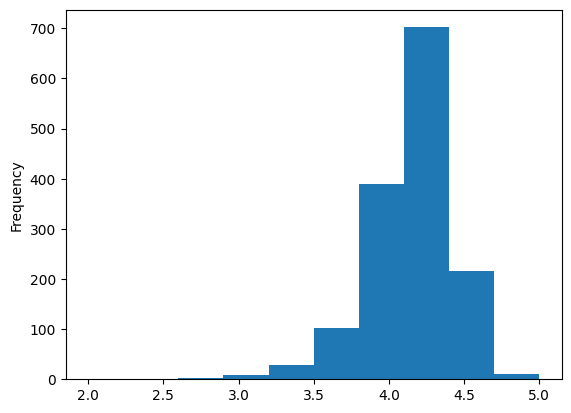

In [28]:
df['rating'].plot(kind='hist')

In [29]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [30]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([  1.,   1.,   3.,   8.,  28., 103., 390., 702., 215.,  11.]),
 array([2. , 2.3, 2.6, 2.9, 3.2, 3.5, 3.8, 4.1, 4.4, 4.7, 5. ]),
 <BarContainer object of 10 artists>)

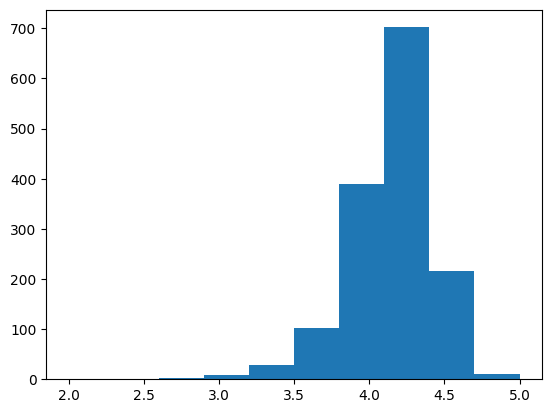

In [32]:
plt.hist(df['rating'])

<Axes: xlabel='rating', ylabel='Count'>

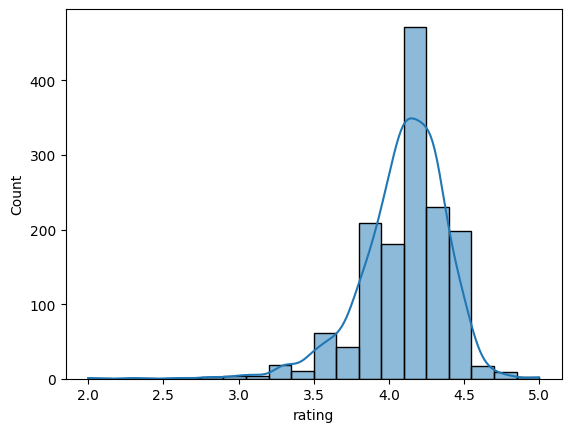

In [41]:
sns.histplot(df['rating'], bins=20, kde=True)

<Axes: xlabel='rating', ylabel='Density'>

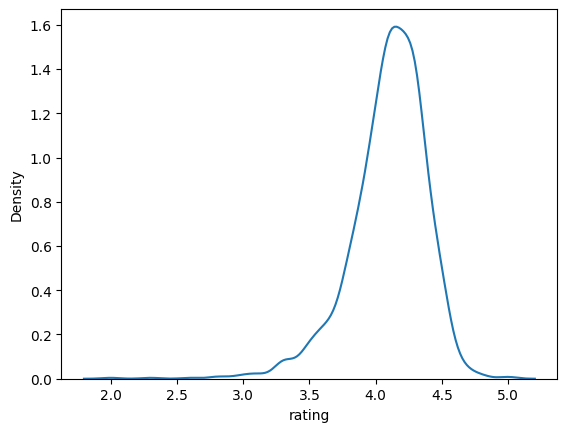

In [42]:
sns.kdeplot(df['rating'])

In [45]:
# gráfico de linha
voos = sns.load_dataset('flights')
voos.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


<Axes: xlabel='year', ylabel='passengers'>

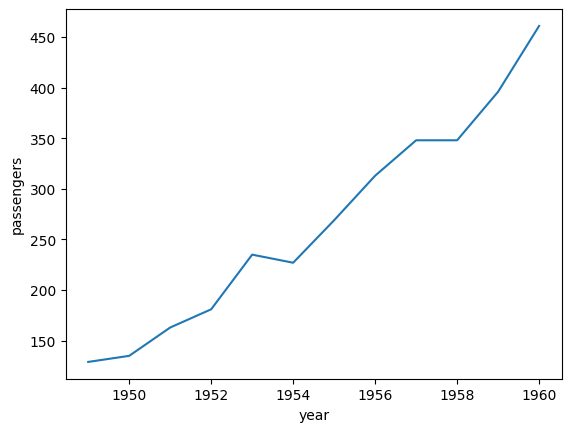

In [48]:
sns.lineplot(data=voos[voos['month'] == 'Apr'], x='year', y='passengers')

([<matplotlib.axis.XTick at 0x3064eee50>,
 [Text(0, 0, '0'),
  Text(2000, 0, '2000'),
  Text(5000, 0, '5000'),
  Text(20000, 0, '20000')])

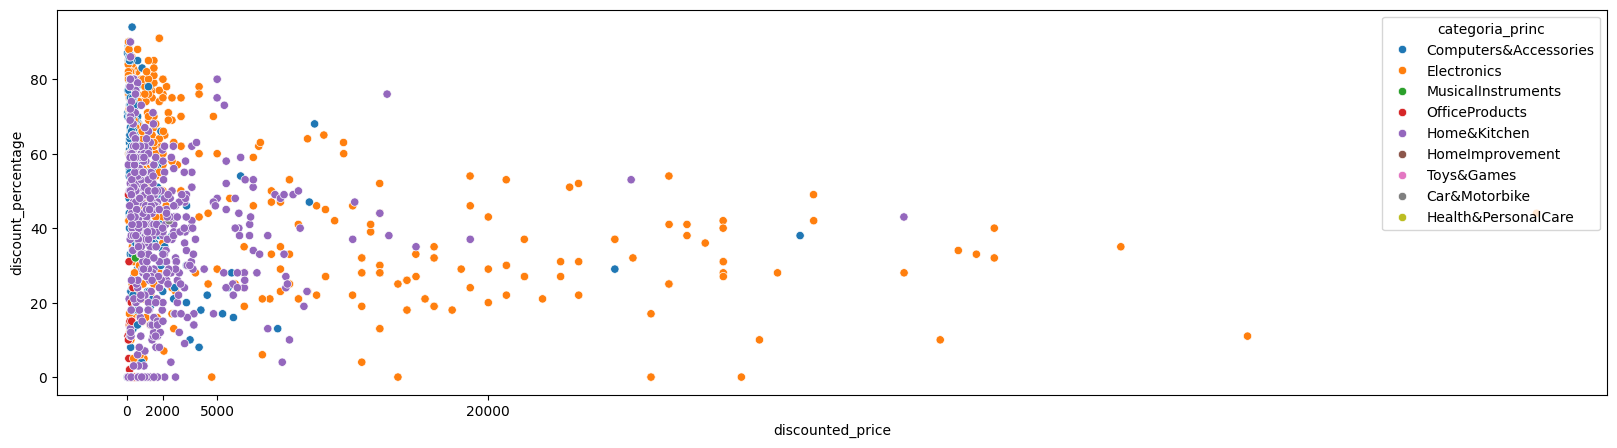

In [63]:
plt.figure(figsize=(20,5))

sns.scatterplot(data=df, x='discounted_price', y='discount_percentage', hue='categoria_princ')
plt.xticks([0, 2000, 5000, 20000])

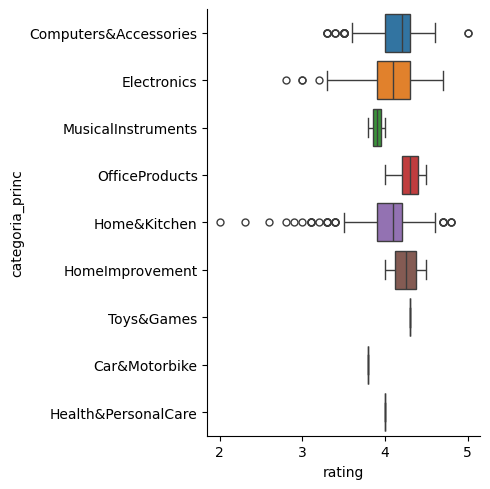

In [79]:
# criar informaçnoes e tipos de graficos diferentes por actegorias
sns.catplot(x='rating', y='categoria_princ', kind='box', hue='categoria_princ', data=df, estimator='mean')

In [75]:
# mostro na proxima aula
# plt.pie(df['categoria_princ'])

<Axes: xlabel='rating', ylabel='categoria_princ'>

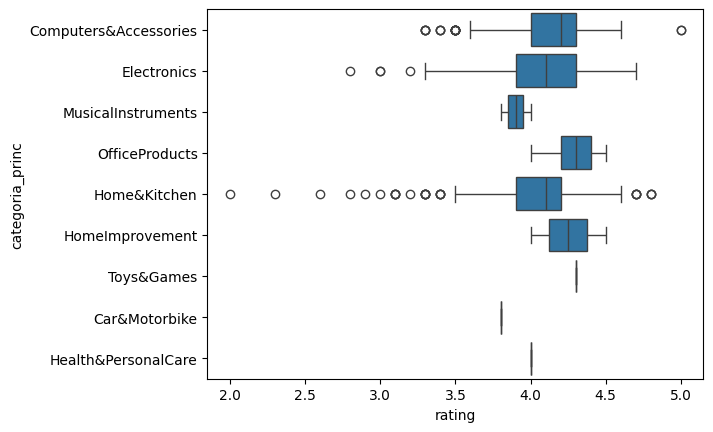

In [78]:
sns.boxplot(data=df, x='rating', y='categoria_princ')

In [80]:
df.to_csv("save.csv", sep=',', index=False)